<a href="https://colab.research.google.com/github/abhishek-kr27/100-Days-of-Python/blob/main/GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

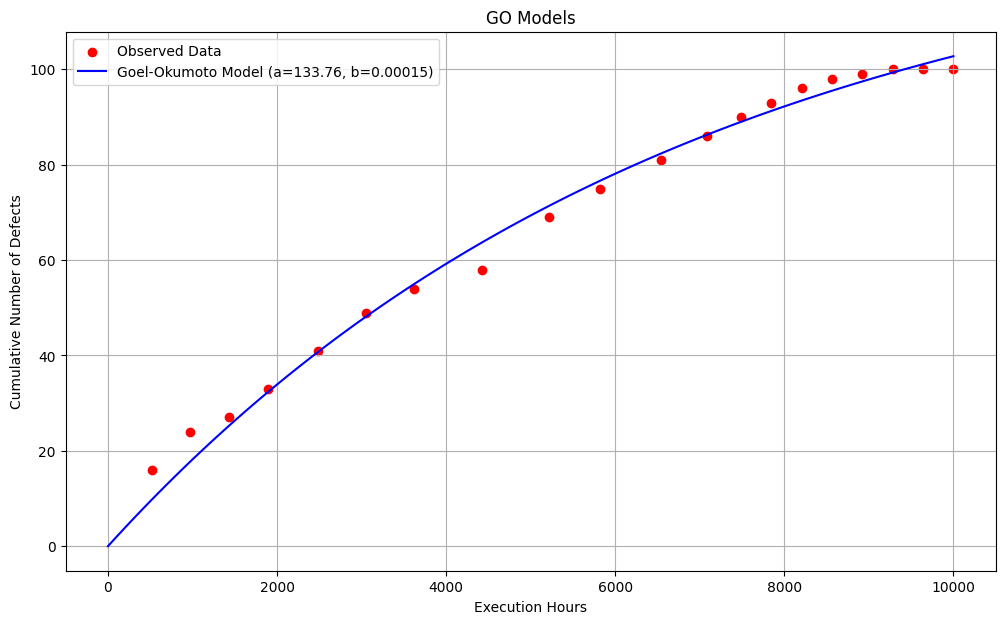


Original Goel-Okumoto Model:
  Parameters: a = 133.76, b = 0.00015
  MSE: 7.7576, R^2: 0.9905, Bias: -0.4996

Last 5 predicted defect values for Goel-Okumoto Model:
Week 16: Predicted Defects = 95.50
Week 17: Predicted Defects = 97.45
Week 18: Predicted Defects = 99.31
Week 19: Predicted Defects = 101.07
Week 20: Predicted Defects = 102.74


In [43]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Goel-Okumoto Model
def goel_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t))

data = {
    "Test Week": list(range(1, 21)),
    "Execution Hours": [519, 968, 1430, 1893, 2490, 3058, 3625, 4422, 5218, 5823, 6539, 7083, 7487, 7846, 8205, 8564, 8923, 9282, 9641, 10000],
    "No. of Defects": [16, 24, 27, 33, 41, 49, 54, 58, 69, 75, 81, 86, 90, 93, 96, 98, 99, 100, 100, 100],
}
df = pd.DataFrame(data)
x_data = np.array(df["Execution Hours"])
y_data = np.array(df["No. of Defects"])

# Fit models
params_go, _ = curve_fit(goel_okumoto, x_data, y_data, p0=[100, 0.001])
a_go, b_go = params_go

# Predictions
x_fit = np.linspace(0, 10000, 100)
y_fit_go = goel_okumoto(x_fit, a_go, b_go)

def compute_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    bias = np.mean(y_pred - y_true)
    return mse, r_squared, bias

y_pred_go = goel_okumoto(x_data, a_go, b_go)
mse_go, r2_go, bias_go = compute_metrics(y_data, y_pred_go)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, color="red", label="Observed Data")
plt.plot(x_fit, y_fit_go, color="blue", label=f"Goel-Okumoto Model (a={a_go:.2f}, b={b_go:.5f})")
plt.title("GO Models")
plt.xlabel("Execution Hours")
plt.ylabel("Cumulative Number of Defects")
plt.legend()
plt.grid(True)
plt.show()

print("\nOriginal Goel-Okumoto Model:")
print(f"  Parameters: a = {a_go:.2f}, b = {b_go:.5f}")
print(f"  MSE: {mse_go:.4f}, R^2: {r2_go:.4f}, Bias: {bias_go:.4f}")

# Print last 5 predicted values for GO Model
last_5_defects = goel_okumoto(x_data[-5:], a_go, b_go)
print("\nLast 5 predicted defect values for Goel-Okumoto Model:")
for week, defects in zip(df["Test Week"][-5:], last_5_defects):
    print(f"Week {week}: Predicted Defects = {defects:.2f}")

In [44]:
# Goel-Okumoto Model with Testing Effort
def goel_okumoto_with_effort(t, a, b, c):
    W_t = c * (1 - np.exp(-b * t))  # Proportional testing effort
    return a * (1 - np.exp(-b * W_t))

# Fit models
params_effort, _ = curve_fit(goel_okumoto_with_effort, x_data, y_data, p0=[100, 0.001, 0.1], maxfev=10000)
a_effort, b_effort, c_effort = params_effort

# Predictions
x_fit = np.linspace(0, 10000, 100)
y_fit_effort = goel_okumoto_with_effort(x_fit, a_effort, b_effort, c_effort)

mse_effort, r2_effort, bias_effort = compute_metrics(y_data, y_pred_effort)
y_pred_effort = goel_okumoto_with_effort(x_data, a_effort, b_effort, c_effort)

print("\nGoel-Okumoto Model with Testing Effort:")
print(f"  Parameters: a = {a_effort:.2f}, b = {b_effort:.5f}")
print(f"  MSE: {mse_effort:.4f}, R^2: {r2_effort:.4f}, Bias: {bias_effort:.4f}")


Goel-Okumoto Model with Testing Effort:
  Parameters: a = 214.96, b = 0.00008
  MSE: 7.3930, R^2: 0.9909, Bias: -0.4402


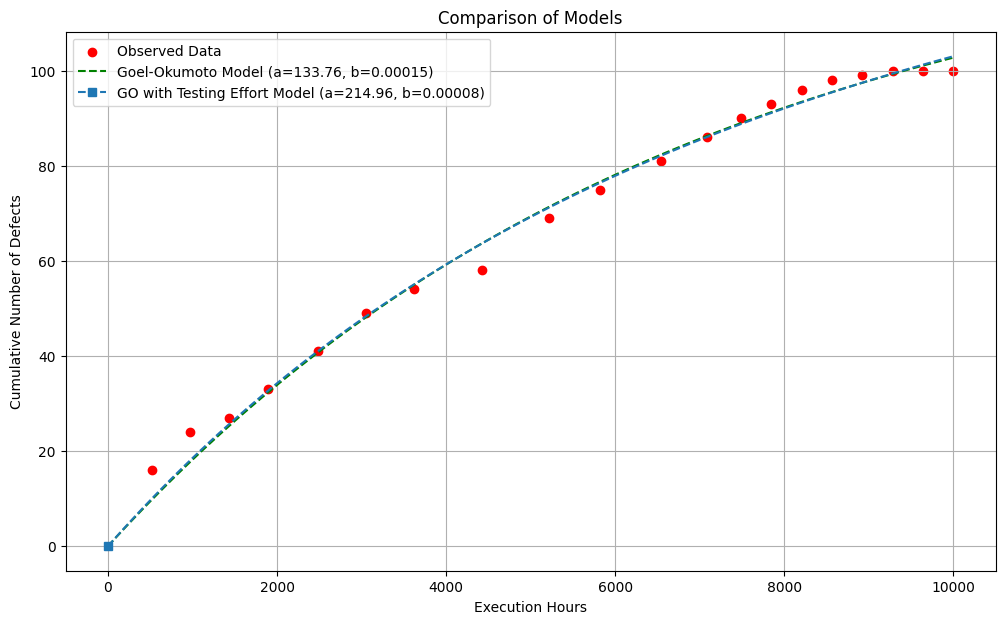

In [41]:
# Comparsion Plot
plt.figure(figsize=(12, 7))
plt.scatter(x_data, y_data, color="red", label="Observed Data")
plt.plot(x_fit, y_fit_go, 'g--', label=f"Goel-Okumoto Model (a={a_go:.2f}, b={b_go:.5f})",  markevery=[0])
plt.plot(x_fit, y_fit_effort, 's--', label=f"GO with Testing Effort Model (a={a_effort:.2f}, b={b_effort:.5f})", markevery=[0])

plt.title("Comparison of Models")
plt.xlabel("Execution Hours")
plt.ylabel("Cumulative Number of Defects")
plt.legend()
plt.grid(True)
plt.show()